In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 4.6 MB/s eta 0:00:00


In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 10.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.impute import KNNImputer

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
X_train = pd.read_csv('/content/x_train.csv')
X_test = pd.read_csv('/content/x_test.csv')
y_train = pd.read_csv('/content/y_train.csv')

In [ ]:
X_train

,id,cat,cow,dog,horse,sheep,bounds_x,bounds_y,bounds_width,bounds_height,...,L_F_paw_y,R_F_paw_v,R_F_paw_x,R_F_paw_y,L_B_paw_v,L_B_paw_x,L_B_paw_y,R_B_paw_v,R_B_paw_x,R_B_paw_y
0,265,0,1,0,0,0,37,16,240,170,...,167,1,161,168,1,94,173,1,55,177
1,676,0,0,0,1,0,43,8,208,236,...,213,1,193,209,1,77,232,1,115,233
2,441,0,0,1,0,0,65,0,234,222,...,0,0,0,0,0,0,0,0,0,0
3,328,0,1,0,0,0,15,8,272,178,...,171,1,190,172,1,52,176,1,35,178
4,102,1,0,0,0,0,2,1,148,146,...,130,1,68,131,1,3,128,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,356,0,1,0,0,0,15,1,266,188,...,0,0,0,0,0,0,0,0,0,0
672,960,0,0,0,0,1,123,72,702,580,...,615,1,618,617,1,172,599,1,223,609
673,812,0,0,0,0,1,57,12,176,176,...,170,1,171,175,1,80,172,1,107,176
674,132,1,0,0,0,0,19,8,278,214,...,218,1,130,219,1,290,106,1,260,121


In [ ]:

X_train = X_train.drop(columns = 'id')
y_train = y_train.drop(columns = 'id')

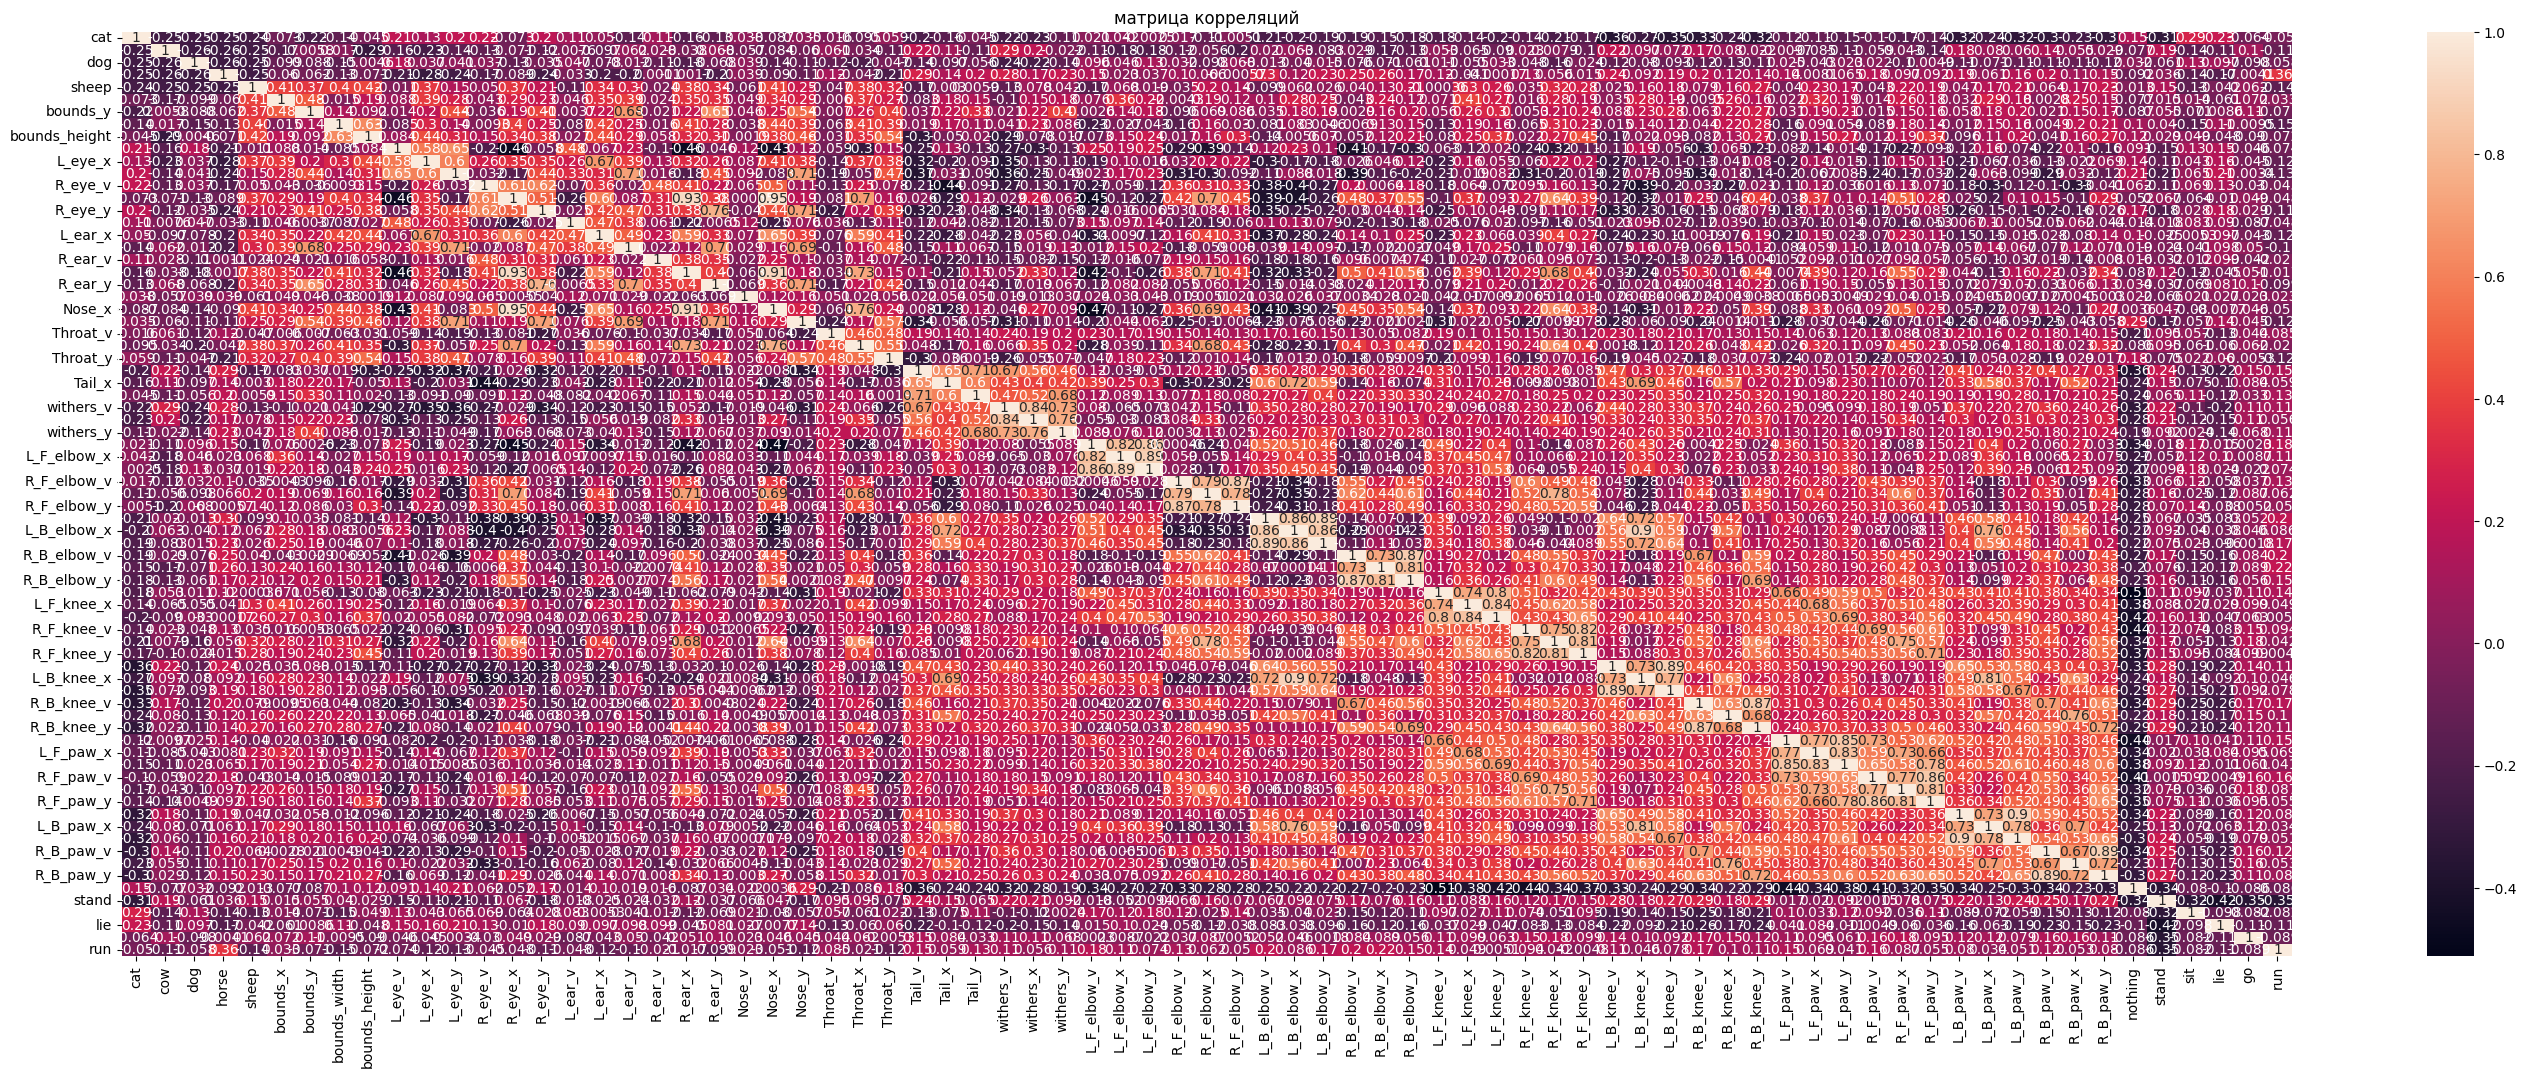

In [ ]:
fig, ax = plt.subplots(figsize=(35, 12))
sns.heatmap(pd.concat([X_train,y_train], axis = 1).corr(), annot=True)
plt.title("матрица корреляций");

In [ ]:
corr_matrix = X_train.corr().abs()

mask = (corr_matrix >= 0.955) & (corr_matrix < 1.0)

features_to_remove = set()
for column in mask.columns:
    correlated_features = mask.index[mask[column]].tolist()
    features_to_remove.update(correlated_features)

new_data = X_train.drop(features_to_remove, axis=1)

In [ ]:
y_train['label'] = 0

In [ ]:
category_codes = {'nothing': 0,'stand': 1,'sit': 2,'lie': 3,'go': 4,'run': 5}

y_train['label'] = y_train[['nothing', 'stand', 'sit', 'lie', 'go', 'run']].apply(lambda row: category_codes[row.idxmax()], axis=1)

y_train.head()

,nothing,stand,sit,lie,go,run,label
0,0,0,0,0,1,0,4
1,0,0,0,0,1,0,4
2,1,0,0,0,0,0,0
3,0,1,0,0,0,0,1
4,0,0,0,1,0,0,3


In [ ]:
y_train = y_train.drop(columns = ['nothing', 'stand', 'sit', 'lie', 'go', 'run'])

In [ ]:
y_train

In [ ]:
model = CatBoostClassifier(verbose = 350)
model.fit(X_train,y_train)

Learning rate set to 0.077562


KeyboardInterrupt: ignored

In [ ]:
xgbmodel = XGBClassifier()
lgbmodel = LGBMClassifier()

xgbmodel.fit(X_train, y_train)
lgbmodel.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


LGBMClassifier()

In [ ]:
subm = model.predict(X_test.drop(columns = 'id'))
subm = subm.flatten()

In [ ]:
subm1 = xgbmodel.predict(X_test.drop(columns = 'id'))
subm1 = subm1.flatten()

In [ ]:
subm = pd.DataFrame({'id' : X_test['id'], 'label' : subm1})
subm.to_csv('submission.csv', index  = False)

In [ ]:
subm2 = lgbmodel.predict(X_test.drop(columns = 'id'))
subm2 = subm2.flatten()
subm2 = pd.DataFrame({'id' : X_test['id'], 'label' : subm2})
subm2.to_csv('submission.csv', index  = False)

In [ ]:
subm = pd.DataFrame({'id' : X_test['id'], 'label' : subm})

In [ ]:
subm.to_csv('submission.csv', index  = False)

Проверяем точность

In [ ]:
X, y = X_train, y_train
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [ ]:
model2 = CatBoostClassifier(verbose = 350)
model2.fit(X_train,y_train)

Learning rate set to 0.075986
0:	learn: 1.7132973	total: 52.9ms	remaining: 52.9s
350:	learn: 0.1615238	total: 13.3s	remaining: 24.6s
700:	learn: 0.0678177	total: 26.6s	remaining: 11.3s
999:	learn: 0.0430078	total: 37.3s	remaining: 0us


In [ ]:
xgbmodel.fit(X_train, y_train)
lgbmodel.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


LGBMClassifier()

In [ ]:
y_pred = model2.predict(X_test) 
y_pred3 = xgbmodel.predict(X_test)
y_pred4 = lgbmodel.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred), accuracy_score(y_test,y_pred3), accuracy_score(y_test,y_pred4)

(0.7053571428571429, 0.7053571428571429, 0.7098214285714286)

Подбор параметров

In [ ]:
import optuna
from catboost import CatBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Разделение данных на обучающую и проверочную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Функция для оптимизации гиперпараметров с помощью Optuna
def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
        'depth': trial.suggest_int('depth', 3, 10),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e2),
        'random_strength': trial.suggest_loguniform('random_strength', 1e-5, 1e2),
        'border_count': trial.suggest_int('border_count', 1, 255),
        'eval_metric': 'MultiClass',
        'loss_function': 'MultiClass'
        'task_type' : 'GPU'
    }
    
    model = CatBoostClassifier(**params)
    model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=False)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

# Создание и запуск оптимизации с помощью Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Вывод результатов
print('Best trial:')
trial = study.best_trial
print('  Accuracy:', trial.value)
print('  Params:', trial.params)